In [1]:
import numpy as np
import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [3]:
#normalize image from [0, 255] to [-0.5, 0.5]
train_images = (train_images/255) - 0.5
test_images = (test_images / 255) - 0.5


#Flatten images: 28 x 28 into a 784 dimensional vector
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))


#Print shape
print(train_images.shape)
print(test_images.shape)

#Prints 60,000 rows and 784 columns
#Prints 10,000 rows and 784 columns

(60000, 784)
(10000, 784)


In [4]:
#Build a model with 3 layers!
#2 layers with 64 neurons and relu function
#1 ouput layer with 10 neurons and softmax function
model = Sequential()
model.add(Dense(64, activation= 'relu', input_dim = 784))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation='softmax'))


In [5]:
#Compile
#Loss function measures how well the model does on training, tries to improve using the optimizer
#Crossentropy allows classes that are greater than 2
model.compile(
    optimizer='adam', 
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [6]:
#Train Model
#Observe that the accuracy increases after each iteration - how good is good enough? 95%?
model.fit(
    train_images,
    to_categorical(train_labels), #expects 10 dimensional vector, i.e. 2 becomes [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
    epochs = 5, #Number of iterations over entire dataset
    batch_size = 32 #Number of samples per gradient
)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3639 - accuracy: 0.8902
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1864 - accuracy: 0.9439
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1425 - accuracy: 0.9560
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1206 - accuracy: 0.9617
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1037 - accuracy: 0.9677


In [7]:
#Prediction!
predictions = model.predict(test_images[20:25])
print(np.argmax(predictions, axis = 1))
print(test_labels[20:25])

[9 6 6 5 4]
[9 6 6 5 4]


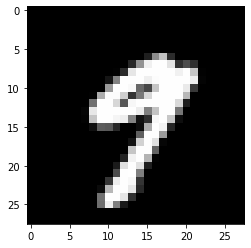

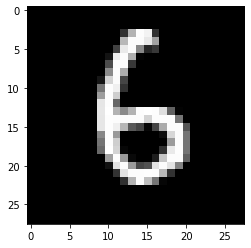

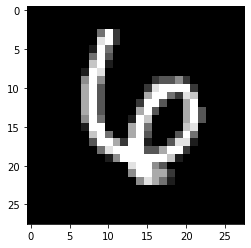

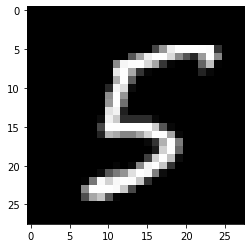

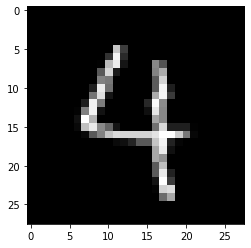

In [10]:
#Print the actual images
for i in range(20, 25):
  first_image = test_images[i]
  first_image = np.array(first_image, dtype = 'float')
  pixels = first_image.reshape((28, 28))
  plt.imshow(pixels, cmap = 'gray')
  plt.show()